In [1]:
install.packages( "tictoc" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library( tictoc)

In [4]:
# takes 23 minutes
tic()
install.packages( "brms" )
toc()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘numDeriv’, ‘plyr’, ‘httpuv’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘htmlwidgets’, ‘miniUI’, ‘crosstalk’, ‘zoo’, ‘igraph’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘RcppEigen’, ‘BH’, ‘checkmate’, ‘tensorA’, ‘distributional’, ‘ggridges’, ‘reshape2’, ‘shiny’, ‘colourpicker’, ‘DT’, ‘dygraphs’, ‘gtools’, ‘markdown’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘xtable’, ‘xts’, ‘mvtnorm’, ‘Brobdingnag’, ‘globals’, ‘listenv’, ‘parallelly’, ‘Rcpp’, ‘rstan’, ‘loo’, ‘posterior’, ‘rstantools’, ‘bayesplot’, ‘shinystan’, ‘bridgesampling’, ‘future’, ‘matrixStats’, ‘nleqslv’, ‘coda’, ‘abind’




1376.92 sec elapsed


In [5]:
set.seed( 42 )

In [9]:
uniform_noise <- function( min=-1, max=1 ) { 
    runif( n=200, min, max )
}

In [10]:
gaussian_noise <- function( c=1 ) { 
    rnorm( n=200 ) * c
}

In [6]:
GenerateFake <- function (){
    Y <- uniform_noise( -10, 10 ) + 7
    X1 <- Y + gaussian_noise(1)
    X2 <- Y + gaussian_noise(2)
    X3 <- Y + gaussian_noise(4)
    trash1 <- gaussian_noise(10)
    trash2 <- gaussian_noise(10)
    trash3 <- gaussian_noise(10)
    fake_data <- data.frame( Y, X1, X2, X3, trash1, trash2, trash3 )
    return( fake_data )
}

In [11]:
fake_data <- GenerateFake()

In [12]:
model1 <- lm( Y ~ ., fake_data )

In [13]:
summary( model1 )


Call:
lm(formula = Y ~ ., data = fake_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2072 -0.4907  0.0534  0.4554  2.9097 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.192795   0.096240   2.003   0.0465 *  
X1          0.759026   0.030510  24.878  < 2e-16 ***
X2          0.164875   0.029318   5.624 6.49e-08 ***
X3          0.058825   0.014160   4.154 4.90e-05 ***
trash1      0.004954   0.006172   0.803   0.4231    
trash2      0.005524   0.005470   1.010   0.3138    
trash3      0.001290   0.006154   0.210   0.8341    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8384 on 193 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9794 
F-statistic:  1577 on 6 and 193 DF,  p-value: < 2.2e-16


In [15]:
library( brms )

Loading required package: Rcpp

Loading 'brms' package (version 2.17.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar




In [16]:
bayesian_regression <- brm( Y ~ ., fake_data )

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '777590ec210544219f17584173460fc7' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.072289 seconds (Warm-up)
Chain 1:                0.061331 seconds (Sampling)


In [17]:
summary( bayesian_regression )

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: Y ~ X1 + X2 + X3 + trash1 + trash2 + trash3 
   Data: fake_data (Number of observations: 200) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.19      0.10     0.01     0.39 1.00     4154     3086
X1            0.76      0.03     0.70     0.82 1.00     2169     2077
X2            0.16      0.03     0.11     0.22 1.00     2209     2590
X3            0.06      0.01     0.03     0.09 1.00     4076     2913
trash1        0.00      0.01    -0.01     0.02 1.00     6262     3100
trash2        0.01      0.01    -0.01     0.02 1.00     5730     3099
trash3        0.00      0.01    -0.01     0.01 1.00     5238     3021

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.84      0.04     0.76     0.93 1

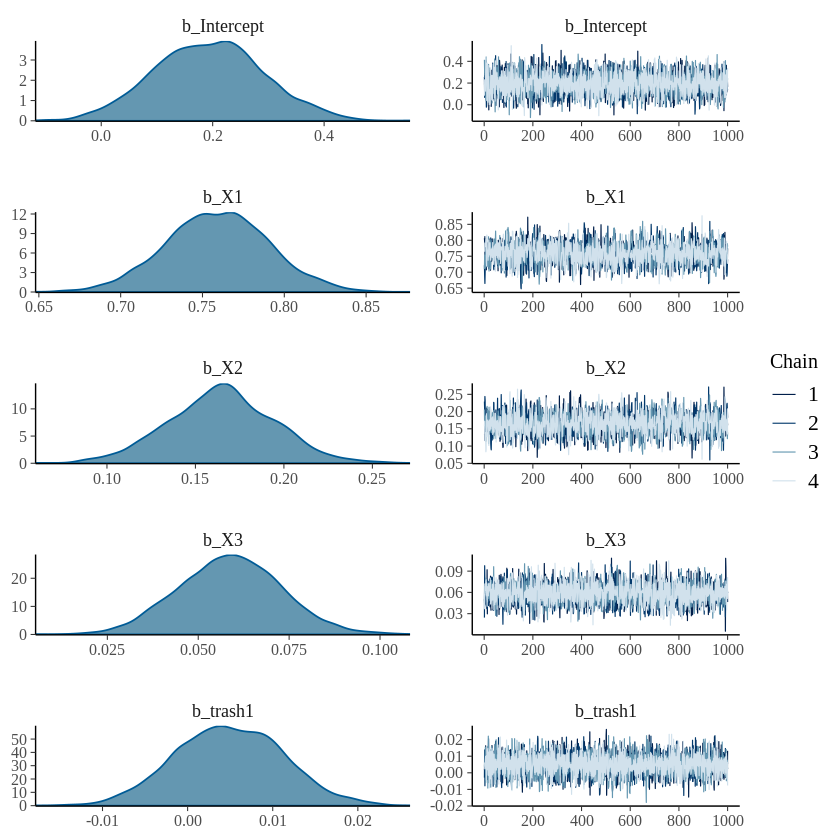

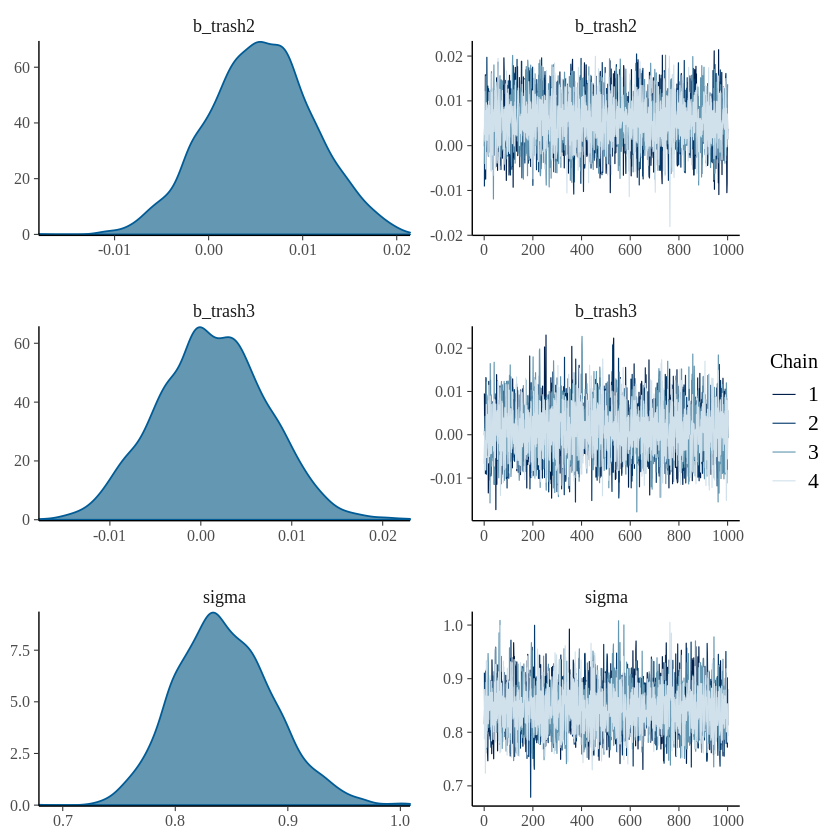

In [18]:
plot( bayesian_regression )